# Template

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

# Plot Measure

In [3]:
def plot_measurement(filepath):
    # Read data
    data = pd.read_csv(f'data/{filepath}', skiprows=2, header=None)
    time = data[0]  
    num_channels = len(data.columns)
    
    # Create figure
    fig, ax = plt.subplots(1, 1, figsize=(6,4))
    
    for i in range(1, num_channels):
        channel_data = data[i]
        if filepath[:3] == 'V04' and i == 2:
            channel_data *= 10
        ax.plot(time * 1000, channel_data, linewidth=1, label=f'Channel {i}') 
    
    ax.set_ylabel(f'Voltage $U$ / V', fontweight='bold')
    ax.set_xlabel('Time $t$ / ms', fontweight='bold')
    ax.grid(True)
    ax.legend(frameon=True)
    
    plt.tight_layout()
    return fig

In [4]:
def get_all_csv() -> list[str]:
    files = sorted([i for i in os.listdir(os.getcwd() + '/data') if i[-4:] == '.csv'])
    if not files:
        print(f"Keine .csv Dateien gefunden.")
        return []

    return list(files)

# Versuch 1 Siliziumdiode

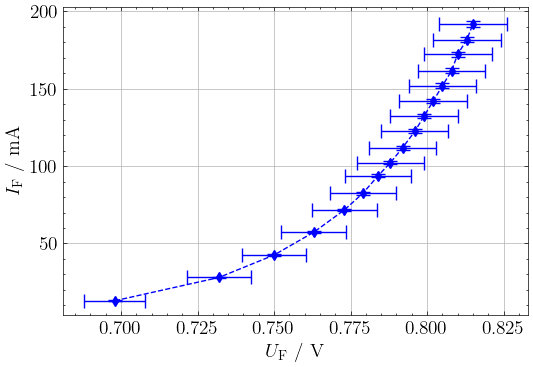

In [5]:
I_F = np.array([12.95, 28.0, 42.52, 57.29, 71.7, 82.4, 93.8, 102.2, 111.9, 122.5, 132.3, 142.1, 151.9, 161.6, 172.3, 181.8, 191.9]) #mA
U_F = np.array([0.698, 0.732, 0.750, 0.763, 0.773, 0.779, 0.784, 0.788, 0.792, 0.796, 0.799, 0.802, 0.805, 0.808, 0.810, 0.813, 0.815]) #V
dU = U_F*0.01 + 0.003
dI = I_F*0.01 + 0.03

fig, ax = plt.subplots(1,1, figsize=(6, 4))

ax.errorbar(x=U_F, y=I_F, xerr=dU, yerr=dI, fmt='d', color='blue', 
                capsize=5, label=r'Messdaten', markersize=5)
ax.plot(U_F, I_F, 'b--')
ax.set_xlabel(r'$U_\text{F}$ / $\text{V}$', fontsize=14)
ax.set_ylabel(r'$I_\text{F}$ / $\text{mA}$', fontsize=14)
ax.grid(True)

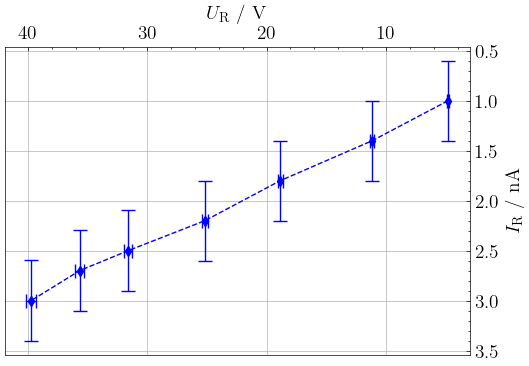

In [6]:
U_R = np.array([4.813, 11.16, 18.86, 25.16, 31.59, 35.65, 39.71])  # V
U_R2 = np.array([0.001, 0.0014, 0.0018, 0.0022, 0.0025, 0.0027, 0.003])  # V

dU = U_R*0.01 + 0.03
dU_r2 = U_R2*0.0008 + 0.0004

I_F = U_R2 * 1000     # nA
dI  = dU_r2 *1000     # nA

fig, ax = plt.subplots(figsize=(6, 4))

ax.errorbar(U_R, I_F, xerr=dU, yerr=dI, fmt='b--d', capsize=5, markersize=5)

# --- Mirror both axes into the negative direction ---
ax.invert_xaxis()
ax.invert_yaxis()

# --- Move y-axis to the right ---
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')

# Labels and grid
ax.set_xlabel(r'$U_\text{R}$ / $\text{V}$', fontsize=14)
ax.set_ylabel(r'$I_\text{R}$ / $\text{nA}$', fontsize=14)
ax.grid(True)

plt.show()

['V02_ZenerDiode_1Periode.csv', 'V02_ZenerDiode_mehrPeriode.csv', 'V03_100O_100muF.csv', 'V03_100O_10muF.csv', 'V03_1500O_100muF.csv', 'V03_1500O_10muF.csv', 'V03_infO_100muF.csv', 'V03_infO_10muF.csv', 'V04_1500O.csv', 'V04_infO.csv']


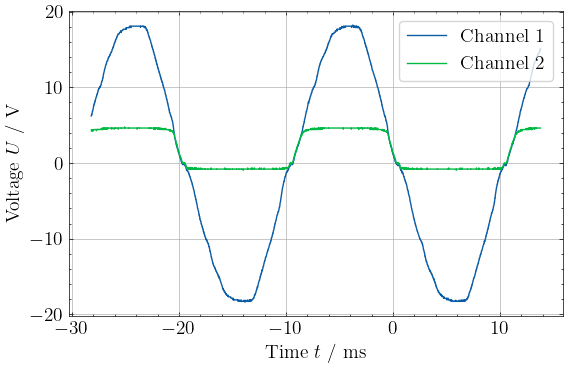

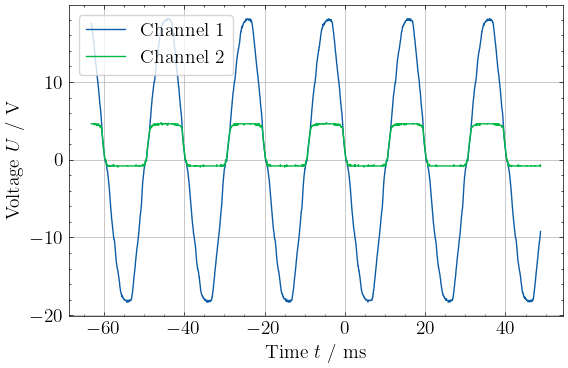

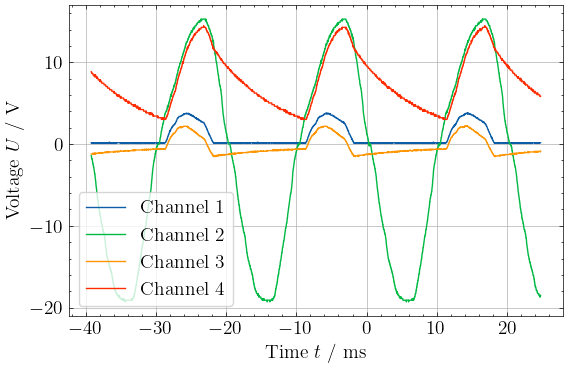

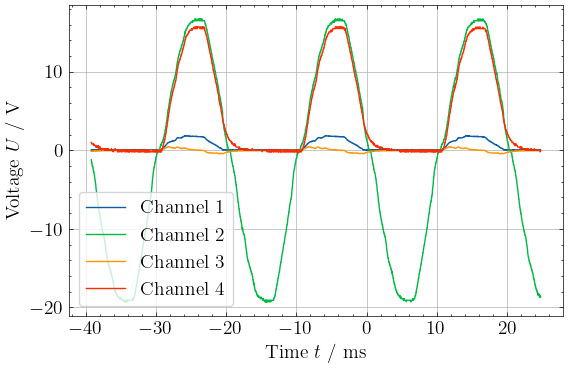

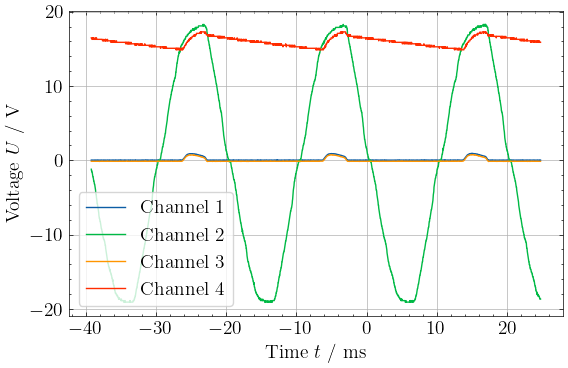

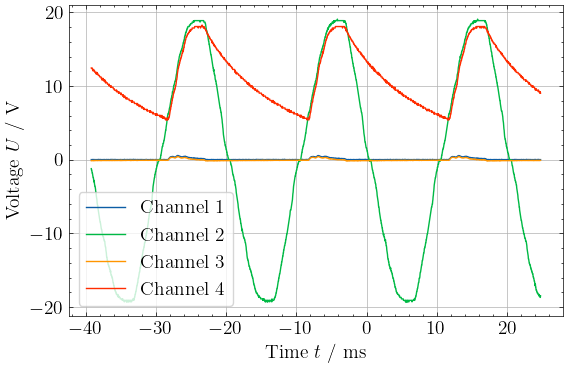

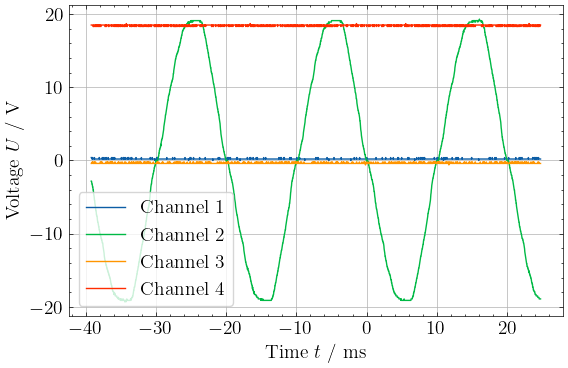

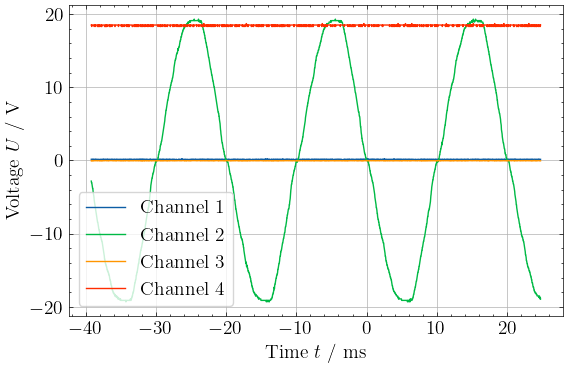

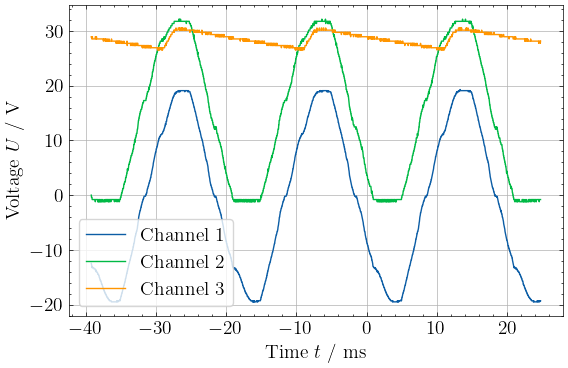

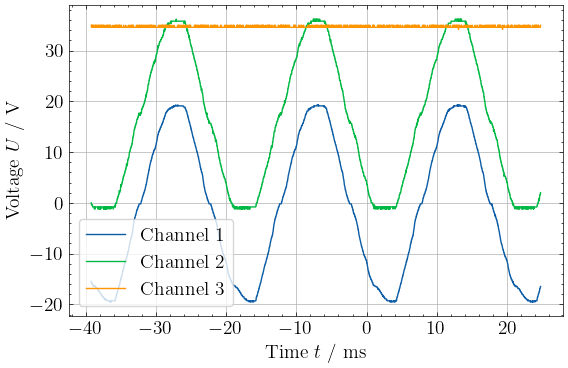

In [7]:
files = get_all_csv()
print(files)
for f in files:
    plot_measurement(f)